In [2]:
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt
import random

In [3]:
def generate_real():
    real_data = torch.FloatTensor(
        [
            random.uniform(0.8,1.0),
            random.uniform(0.0,0.2),
            random.uniform(0.8,1.0),
            random.uniform(0.0,0.2)
        ]
    )
    return real_data

In [11]:
## 构建鉴别器
class Discrimintor(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4,3),
            nn.Sigmoid(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(),lr=0.01)
        self.counter = 0 
        self.progress = []

        pass
    def forward(self,inputs):
        return self.model(inputs)
    def train(self,inputs,targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs,targets)

        self.counter +=1
        if (self.counter %10 ==0):
            self.progress.append(loss.item())
            pass
        if (self.counter %10000 ==0):
            print("counter = ", self.counter)
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        pass
    def plot_progress(self):
        df = pandas.DataFrame(self.progress,columns=['loss'])
        df.plot(ylim=(0,1.0),figsize=(16,8),alpha = 0.1, marker = '.',grid= True,yticks=(0,0.25,0.5))
        pass

In [12]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [15]:
D  = Discrimintor()
for i in range(10000):
    D.train(generate_real(),torch.FloatTensor([1.0]))
    D.train(generate_random(4),torch.FloatTensor([0.0]))

counter =  10000
counter =  20000


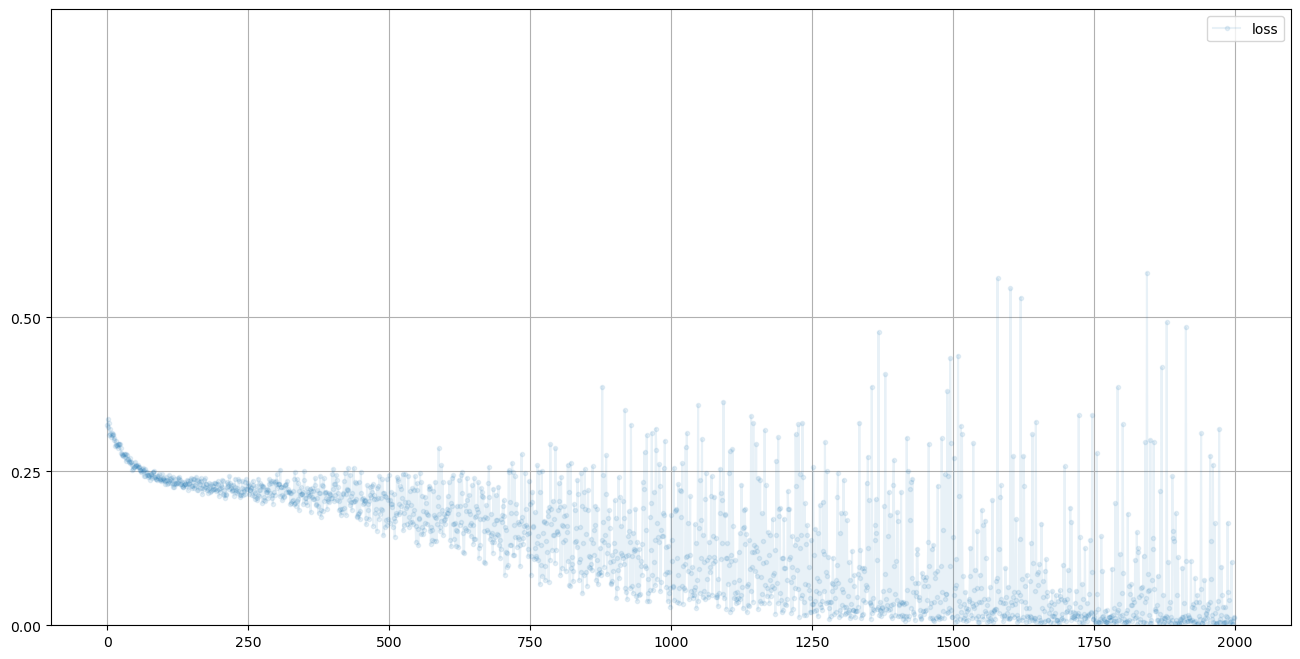

In [16]:
D.plot_progress()

In [21]:
D.forward((generate_random(4)))

tensor([0.1031], grad_fn=<SigmoidBackward0>)

In [33]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1,3),
            nn.Sigmoid(),
            nn.Linear(3,4),
            nn.Sigmoid()
        )
        self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)
        self.counter =0
        self.pregress = []

        pass
    def forward(self,inputs):
        return self.model(inputs)
    def train(self,D,inputs,targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output,targets)
        self.counter +=1
        if(self.counter%10 ==0 ):
            self.pregress.append(loss.item())
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    def plot_progress(self):
        df = pandas.DataFrame(self.pregress,columns=['loss'])
        df.plot(ylim=(0,1.0),figsize=(16,8),alpha = 0.1, marker = '.',grid= True,yticks=(0,0.25,0.5))
        pass

In [39]:
D = Discrimintor()
G = Generator()
image_list = []
for i in range(10000):
    if (1%1000 == 0):
         image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())
    D.train(generate_real(),torch.FloatTensor([1.0]))
    D.train(G.forward(torch.FloatTensor([0.5])).detach(),torch.FloatTensor([0.0]))

    G.train(D,torch.FloatTensor([0.5]),torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000


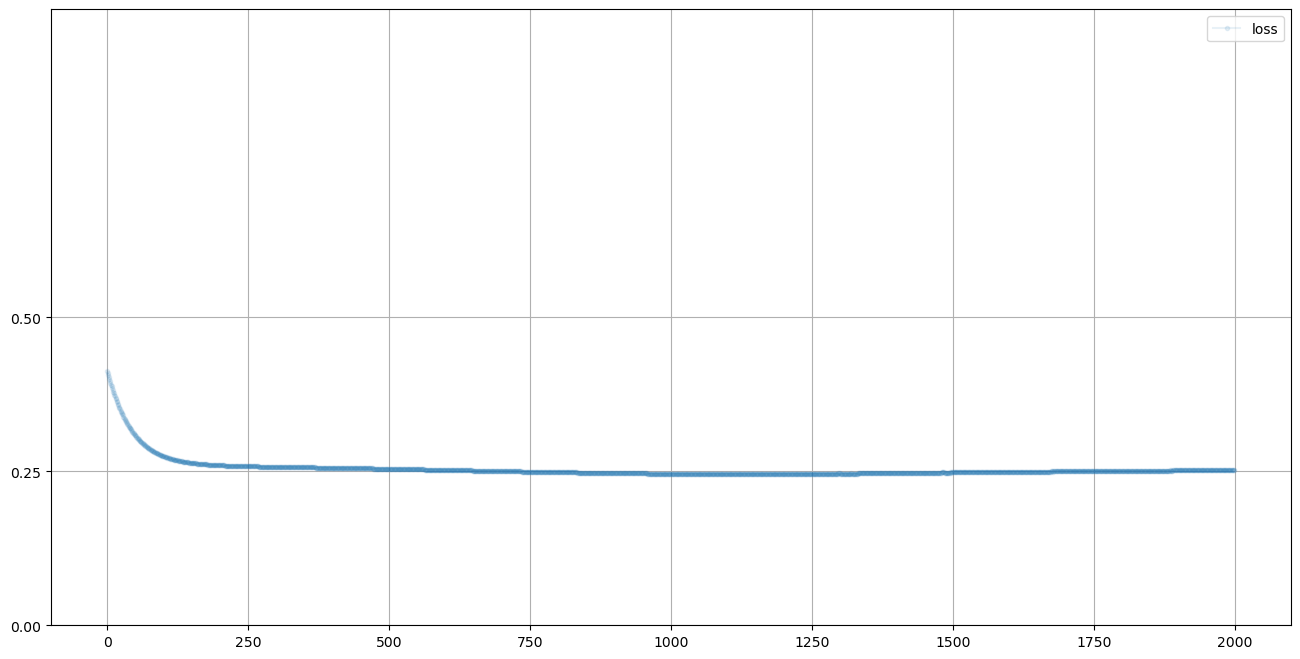

In [40]:
D.plot_progress()

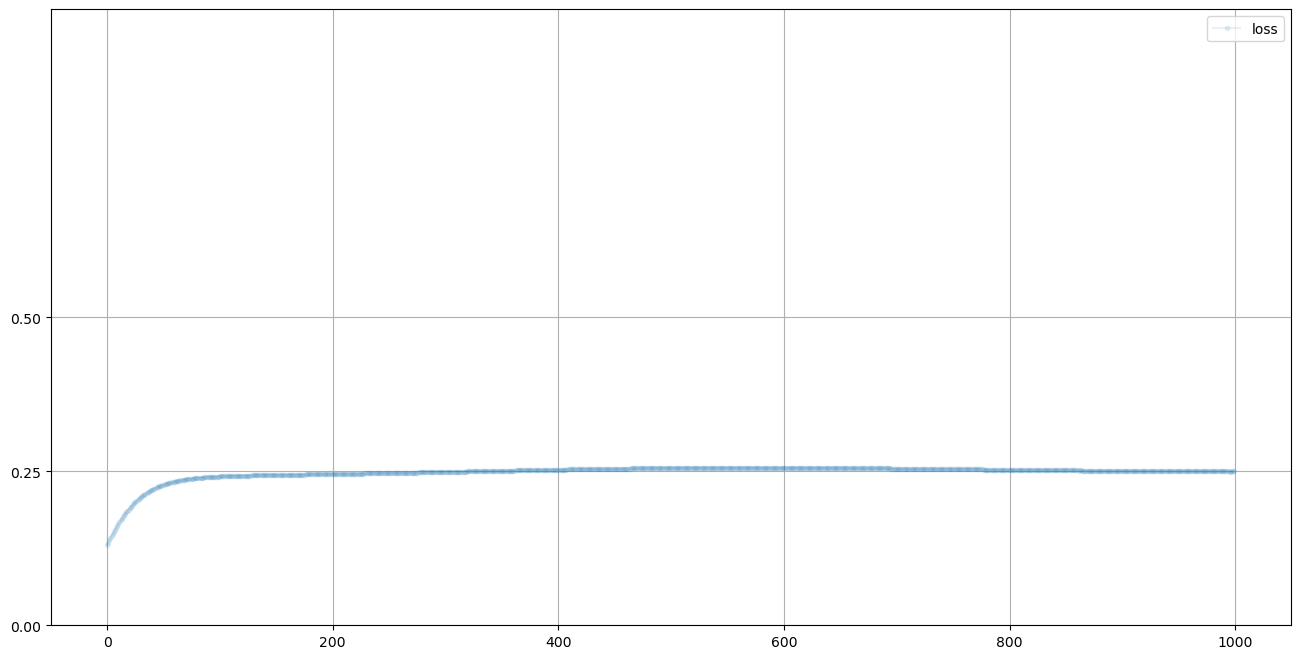

In [41]:
G.plot_progress()